<a href="https://colab.research.google.com/github/manasdhir/pima-indians-diabetes-classification/blob/main/roc_auc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import pylab as pl
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

In [2]:
df1=read_csv("/content/drive/MyDrive/datasets/featurization/pima-indians-diabetes.csv")
df1.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df2=df1.copy()
y=pd.DataFrame(df2.pop("class"))
x=df2

In [4]:
x.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
y.head()

,class
0,1
1,0
2,1
3,0
4,1


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.50,random_state=0)

In [21]:
cls1=LogisticRegression()
cls2=svm.SVC(kernel="linear",probability=True)

In [22]:
cls1.fit(x_train,y_train)
cls2.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

SVC(kernel='linear', probability=True)

In [23]:
cls1_pred=cls1.predict_proba(x_test)
cls2_pred=cls2.predict_proba(x_test)

In [24]:
fpr1,tpr1,thresholds1=roc_curve(y_test,cls1_pred[:,1])
roc_auc1=auc(fpr1,tpr1)#assigns area under the curve
print(roc_auc1)

0.8382463868690221


In [25]:
fpr2,tpr2,thresholds2=roc_curve(y_test,cls2_pred[:,1])
roc_auc2=auc(fpr2,tpr2)#assigns area under the curve
print(roc_auc2)

0.8499683191020728


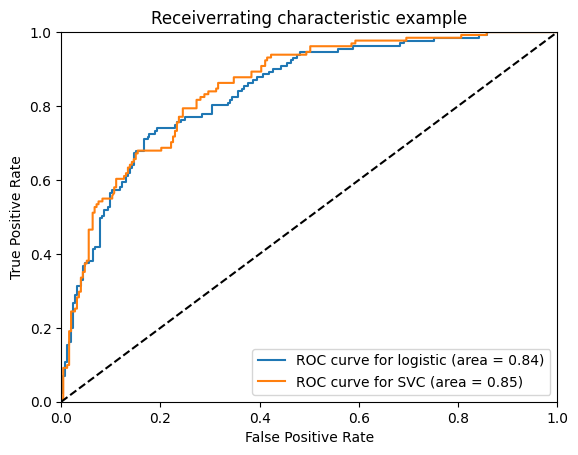

In [26]:
pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for logistic (area = %0.2f)' % roc_auc1)
pl.plot(fpr2, tpr2, label='ROC curve for SVC (area = %0.2f)' % roc_auc2)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

In [27]:
import pandas as pd

i = np.arange(len(tpr1)) # index for df
roc1 = pd.DataFrame({'fpr1' : pd.Series(fpr1, index=i),'tpr1' : pd.Series(tpr1, index = i), '1-fpr1' : pd.Series(1-fpr1, index = i), 'tf1' : pd.Series(tpr1 - (1-fpr1), index = i), 'thresholds1' : pd.Series(thresholds1, index = i)})
print(roc1.loc[(roc1.tf1-0).abs().argsort()[:1]])

i = np.arange(len(tpr2)) # index for df
roc2 = pd.DataFrame({'fpr2' : pd.Series(fpr2, index=i),'tpr2' : pd.Series(tpr2, index = i), '1-fpr2' : pd.Series(1-fpr2, index = i), 'tf2' : pd.Series(tpr2 - (1-fpr2), index = i), 'thresholds2' : pd.Series(thresholds2, index = i)})
print(roc2.loc[(roc2.tf2-0).abs().argsort()[:1]])

        fpr1      tpr1    1-fpr1       tf1  thresholds1
73  0.241107  0.755725  0.758893 -0.003168     0.354241
        fpr2      tpr2    1-fpr2       tf2  thresholds2
68  0.237154  0.755725  0.762846 -0.007121     0.356219


In [28]:
roc1.head(71)

,fpr1,tpr1,1-fpr1,tf1,thresholds1
0,0.000000,0.000000,1.000000,-1.000000,1.961621
1,0.000000,0.007634,1.000000,-0.992366,0.961621
2,0.000000,0.022901,1.000000,-0.977099,0.953007
3,0.003953,0.022901,0.996047,-0.973147,0.937064
4,0.003953,0.068702,0.996047,-0.927345,0.892241
...,...,...,...,...,...
66,0.189723,0.732824,0.810277,-0.077452,0.385854
67,0.193676,0.732824,0.806324,-0.073500,0.385085
68,0.193676,0.740458,0.806324,-0.065866,0.383484
69,0.229249,0.740458,0.770751,-0.030293,0.362844


#modifying threshold for logistic regression

In [29]:
y_pred=cls1.predict(x_test)
from sklearn import metrics
score=metrics.accuracy_score(y_test,y_pred)
score

0.7838541666666666

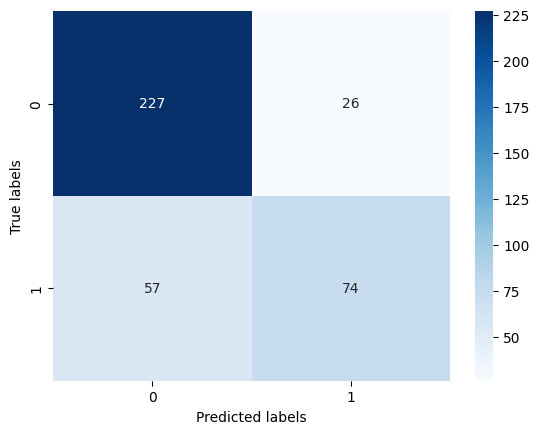

In [30]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
pl.xlabel('Predicted labels')
pl.ylabel('True labels')
pl.show()

In [31]:
y_pred[0:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0])

In [53]:
cls1_pred[0:10,1]

array([0.96047938, 0.21206534, 0.10799096, 0.61668   , 0.18684253,
       0.06733415, 0.72513669, 0.85402782, 0.53271066, 0.327196  ])

In [63]:
y_test.shape

(384, 1)

##adjusting the threshold

In [56]:
from sklearn.preprocessing import binarize
y_pred_class = binarize([cls1_pred[:,1]],threshold= 0.61)  # deciding the class of the 1st 10 records based on new threshold

In [71]:
y_pred_class=pd.DataFrame(y_pred_class[0])

in this way the threshold can be modified if it improves the accuracy

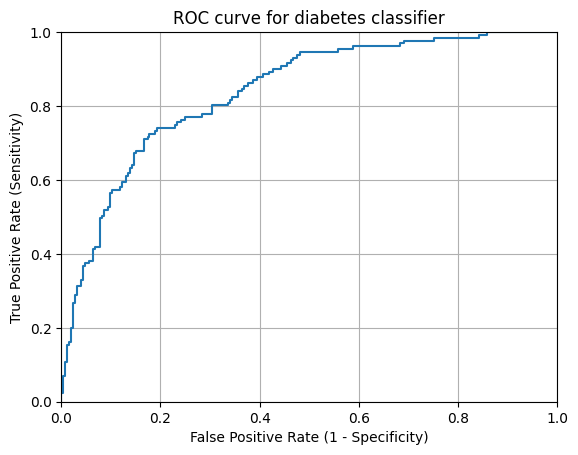

In [74]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, cls1_pred[:,1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

* AUC is useful as a single number summary of classifier performance.
* If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation.
* AUC is useful even when there is high class imbalance (unlike classification accuracy).